# Trabajo Practico N° 1
**Materia:** Minería de datos

**Año:** 2025

**Integrantes:** Juana Chies Doumecq, Nicolas Mancini


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np
import umap

# Algoritmos de reducción de dimensionalidad
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Algoritmos clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,silhouette_samples


from scipy.spatial.distance import cdist

In [168]:
dataset = pd.read_csv('SmartFarmingCropYield.csv')

# Análisis exploratorio de datos (EDA)

In [169]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df.head()

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores duplicados**

In [171]:
df.duplicated().values.any()

False

**Valores faltantes**

In [172]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [173]:
# Visualización de filas que tienen al menos un Nulo
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


Sacamos filas que contienen datos nulos ya que, al ser cualitativas, no pueden inputarse.

In [174]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,Aspersor,Mixto,47.61,121,5264.09,0.70,Leve
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,Manual,Inorganico,49.78,118,5598.46,0.50,Leve
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,Goteo,Organico,23.12,145,2437.08,0.55,Moderate
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,Aspersor,Mixto,31.75,116,4629.49,0.42,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,Manual,Mixto,35.50,128,5528.08,0.31,Leve
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,Goteo,Inorganico,45.16,112,2023.56,0.30,Leve
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,Aspersor,Organico,20.13,122,3708.29,0.47,Moderate
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve


**Distrubuciones de las variables**

In [175]:
#Selección de columnas númericas
columnas_numericas = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'rendimientoKg_hectarea', 'indiceNDVI', 'diasTotales']

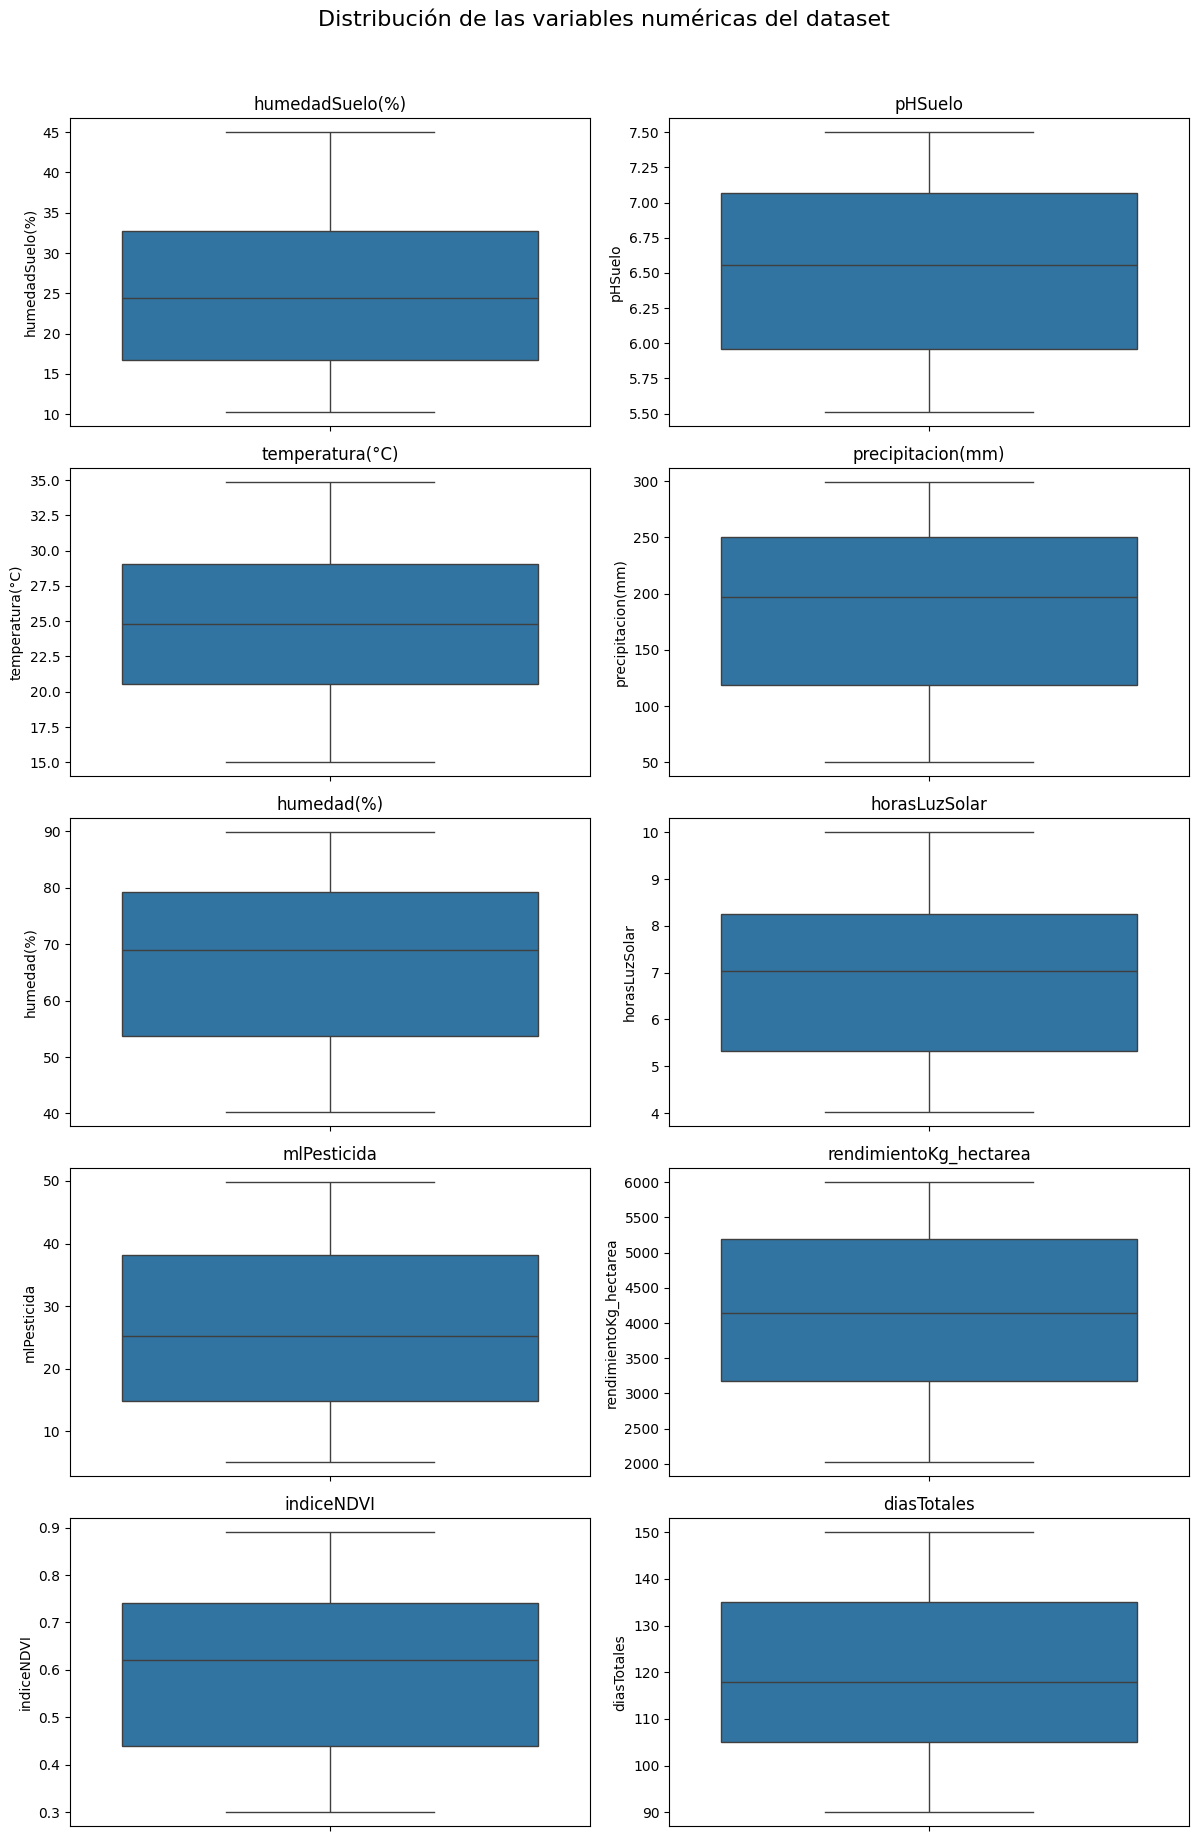

In [176]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

fig.suptitle('Distribución de las variables numéricas del dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Observando el gráfico de las distribución de las variables numéricas del dataset podemos ver que no encontramos valores atípicos, por lo cual no necesitamos ninguna tarea
de filtrado de outliers.


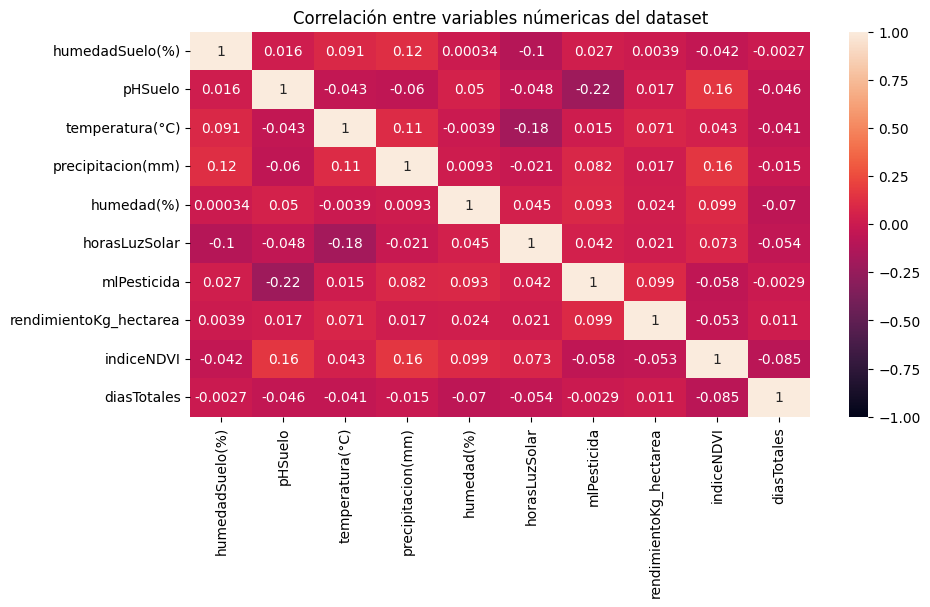

In [177]:
plt.figure(figsize=(10,5))
sns.heatmap(df[columnas_numericas].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables númericas del dataset')
plt.show()

A partir del gráfico se observa que las variables mlPesticida y pHSuelo presentan la correlación más alta del dataset.
Su relación linealmente decreciente (negativa) es muy débil, con un 0.22 de fuerza, lo que indica que las variables del 
dataset no muestran asociaciones lineales significativas.


**Codificación de variables catgorícas**

In [178]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,2931.16,0.80,True,False,True,False,False,False
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,121,5264.09,0.70,False,False,True,False,False,False
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,118,5598.46,0.50,False,True,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,145,2437.08,0.55,True,False,False,True,True,False
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,116,4629.49,0.42,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,128,5528.08,0.31,False,True,True,False,False,False
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,112,2023.56,0.30,True,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,122,3708.29,0.47,False,False,False,True,True,False
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,93,4503.82,0.88,False,False,False,False,False,False


**Normalización de las variables**

In [179]:
cols_bool = [
    "tipoRiego_Goteo",
    "tipoRiego_Manual",
    "tipoFertilizante_Mixto",
    "tipoFertilizante_Organico",
    "estadoEnfermedadesCultivo_Moderate",
    "estadoEnfermedadesCultivo_Severo"
]

X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler()
x_num_escaladas = scaler.fit_transform(X[columnas_numericas])

x_escalado = X.copy()
x_escalado[columnas_numericas] = x_num_escaladas

x_escalado[cols_bool] = x_escalado[cols_bool].astype('int')

x_escalado

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,1.414415,-1.060408,1.132157,1,0,1,0,0,0
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.091070,0.961703,0.569187,0,0,1,0,0,0
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,-0.081540,1.251525,-0.556753,0,1,0,0,0,0
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,1.471952,-1.488661,-0.275268,1,0,0,1,1,0
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,-0.196613,0.411652,-1.007130,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,0.493828,1.190522,-1.626397,0,1,1,0,0,0
159,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-0.426760,-1.847087,-1.682694,1,0,0,0,0,0
160,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,0.148607,-0.386816,-0.725645,0,0,0,1,1,0
161,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,-1.519958,0.302725,1.582534,0,0,0,0,0,0


# PCA

In [180]:
# Obtener todas las componentes principales
pca = PCA(n_components=x_escalado.shape[1])

pca_features = pca.fit_transform(x_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
             'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16' ])
pca_df['tipoCultivo'] = y

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo
0,-0.792205,1.387994,-0.249106,-1.240520,1.486727,0.092036,0.686264,0.788897,-0.080028,0.721274,-0.173658,-0.431566,-1.089214,-0.109730,0.379141,0.205612,Trigo
1,1.829135,0.373127,1.610806,-0.103827,0.341152,0.092011,0.729669,-1.324312,0.539950,-1.001053,-0.505400,-0.277519,-0.385297,-0.217318,-0.160022,0.611790,Maiz
2,1.717243,-0.320325,0.607422,1.116258,0.526360,1.503731,-0.546169,-1.425567,-0.349536,-0.775448,-0.299092,0.332159,0.237228,-0.600584,0.147504,-0.031785,Soja
3,-0.909957,-1.205800,0.076234,-0.968990,0.223515,0.332274,1.718173,0.646215,0.324343,0.623970,0.960097,0.349091,-0.496294,0.257589,0.234220,-0.170357,Trigo
4,1.203857,-0.882238,-0.726363,-0.158559,-1.042544,-1.478319,0.364594,-1.122641,0.677980,-0.074391,-0.355361,0.238594,-0.497282,0.294070,-0.367808,0.272103,Soja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.310045,-0.378169,-0.317706,2.557864,-0.399234,0.700807,0.648770,0.899784,-0.217800,0.558903,-0.974926,0.429983,-0.434588,-0.126167,0.511543,0.328591,Maiz
159,-0.024472,-2.296216,1.122151,-1.932434,-0.448965,1.403694,-1.108097,-0.672703,0.136606,1.231940,0.046666,-0.259379,-0.404603,-0.536295,0.201716,-0.123407,Maiz
160,-0.141585,-1.861031,-0.296660,-1.112751,0.116593,0.638945,-0.993456,0.031583,0.411763,-1.112083,0.695012,0.379379,0.060247,0.186552,-0.439551,0.326600,Trigo
161,-0.055507,2.454070,1.688830,0.420251,0.068840,0.897480,-0.227859,-2.013789,-0.289125,0.101214,0.155578,0.097038,0.140329,-0.614739,-0.442835,0.215465,Maiz


**Selección del número de componentes principales**

Para obtener el número de coponentes principlaes, utilizamos como criterio acumular el 75% de varianza 

In [181]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [182]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                        'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.373047,0.120600,0.120600
1,1.333860,0.117158,0.237758
2,1.266083,0.111205,0.348963
3,1.051417,0.092350,0.441313
4,0.990039,0.086959,0.528272
5,0.970020,0.085201,0.613472
6,0.938075,0.082395,0.695867
7,0.796183,0.069932,0.765799
8,0.752830,0.066124,0.831923
9,0.678837,0.059625,0.891547


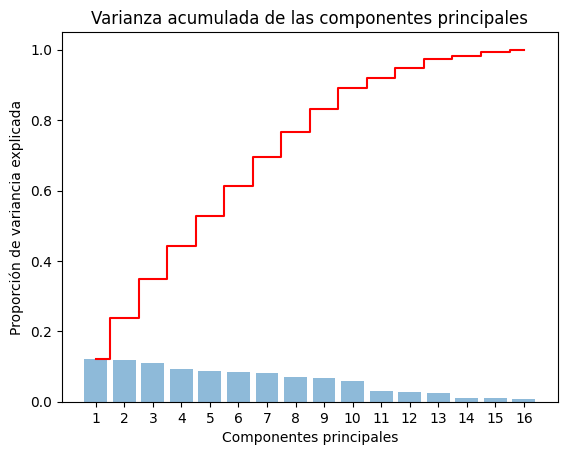

In [183]:
plt.bar(range(1,17), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,17), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.title('Varianza acumulada de las componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componentes principales')
plt.xticks([x for x in range(1,17,1)])
plt.show()

A partir del gráfico podemos observar que la varianza explicada por las cada componente principal es muy baja, siendo que PC1 solo explica el 12% de la varianza, y 
es similar entre el resto de componentes. Por esta razón, para acumular el 75% varianza explicada es necesario usar 7 componentes principales.

In [184]:
pca_filtrado = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'tipoCultivo']]

In [185]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                         cultivo in enumerate(unique_tipoCultivo)}

fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'0': 'PC1', '1': 'PC2','color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="Distribución de tipoCultivo en 2 dimensiones")

fig.show()

El gráfico en 2d, generado a partir de PC1 y PC2 solo explica el 23% de la varianza de los datos, es por esta razón que vemos los datos dispersos.

# ISOMAP

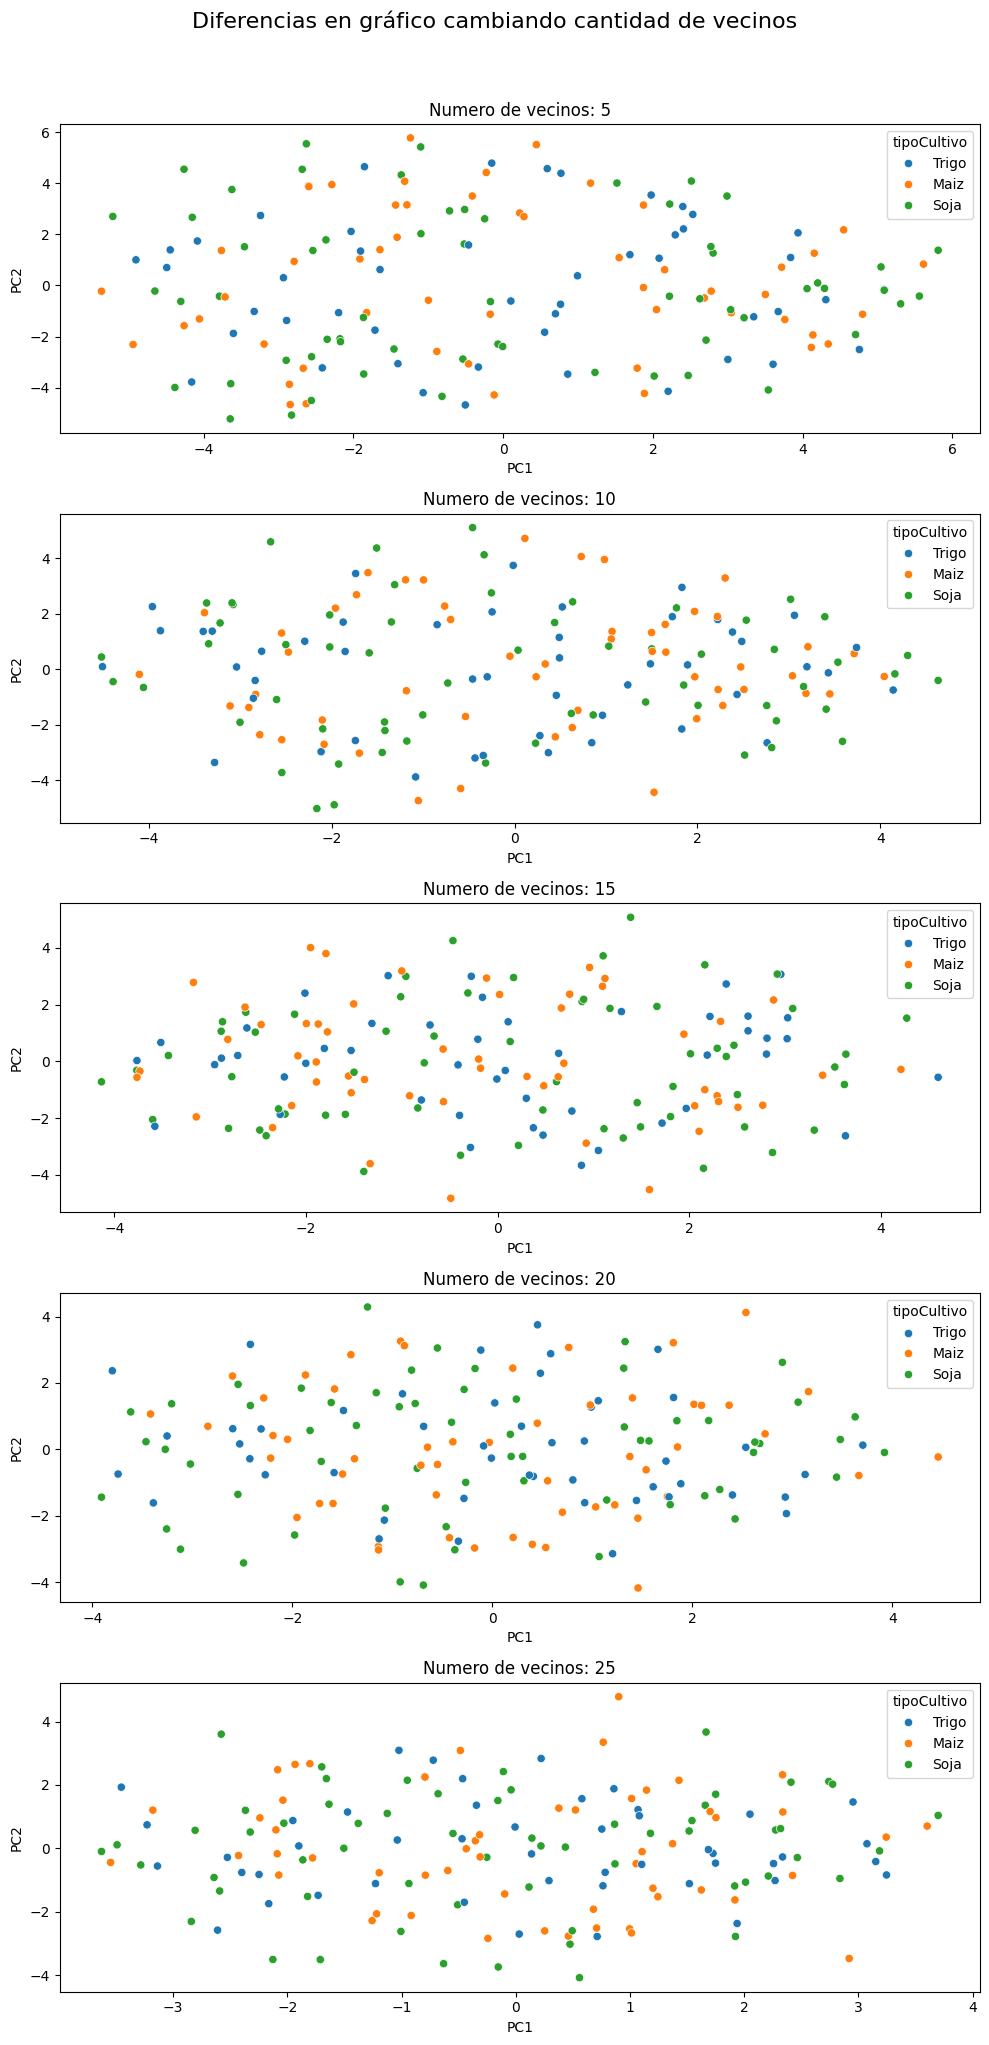

In [186]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
axes = axes.flatten()

for idx, i in enumerate(range(5,30,5)):
    isomap = Isomap(n_neighbors=i, n_components=2)
    X_reduced = isomap.fit_transform(x_escalado)

    df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
    df_isomap['tipoCultivo'] = y

    sns.scatterplot(df_isomap, x='PC1', y='PC2', hue='tipoCultivo',
        ax=axes[idx])

    
    axes[idx].set_title(f'Numero de vecinos: {i}')


fig.suptitle('Diferencias en gráfico cambiando cantidad de vecinos', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Los siguientes gráficos no presentan variaciones entre sí, al cambiar el número de vecinos. En su mayor parte, obtenemos un gráfico donde no se llegá a apreciar ninguna separción clara de grupos como consecuencia de utilizar solo dos componentes, que no son suficientes para explicar la varianza de los datos. A pesar de eso, consideramos que el número de vecinos óptimo es 5.

# T-SNE

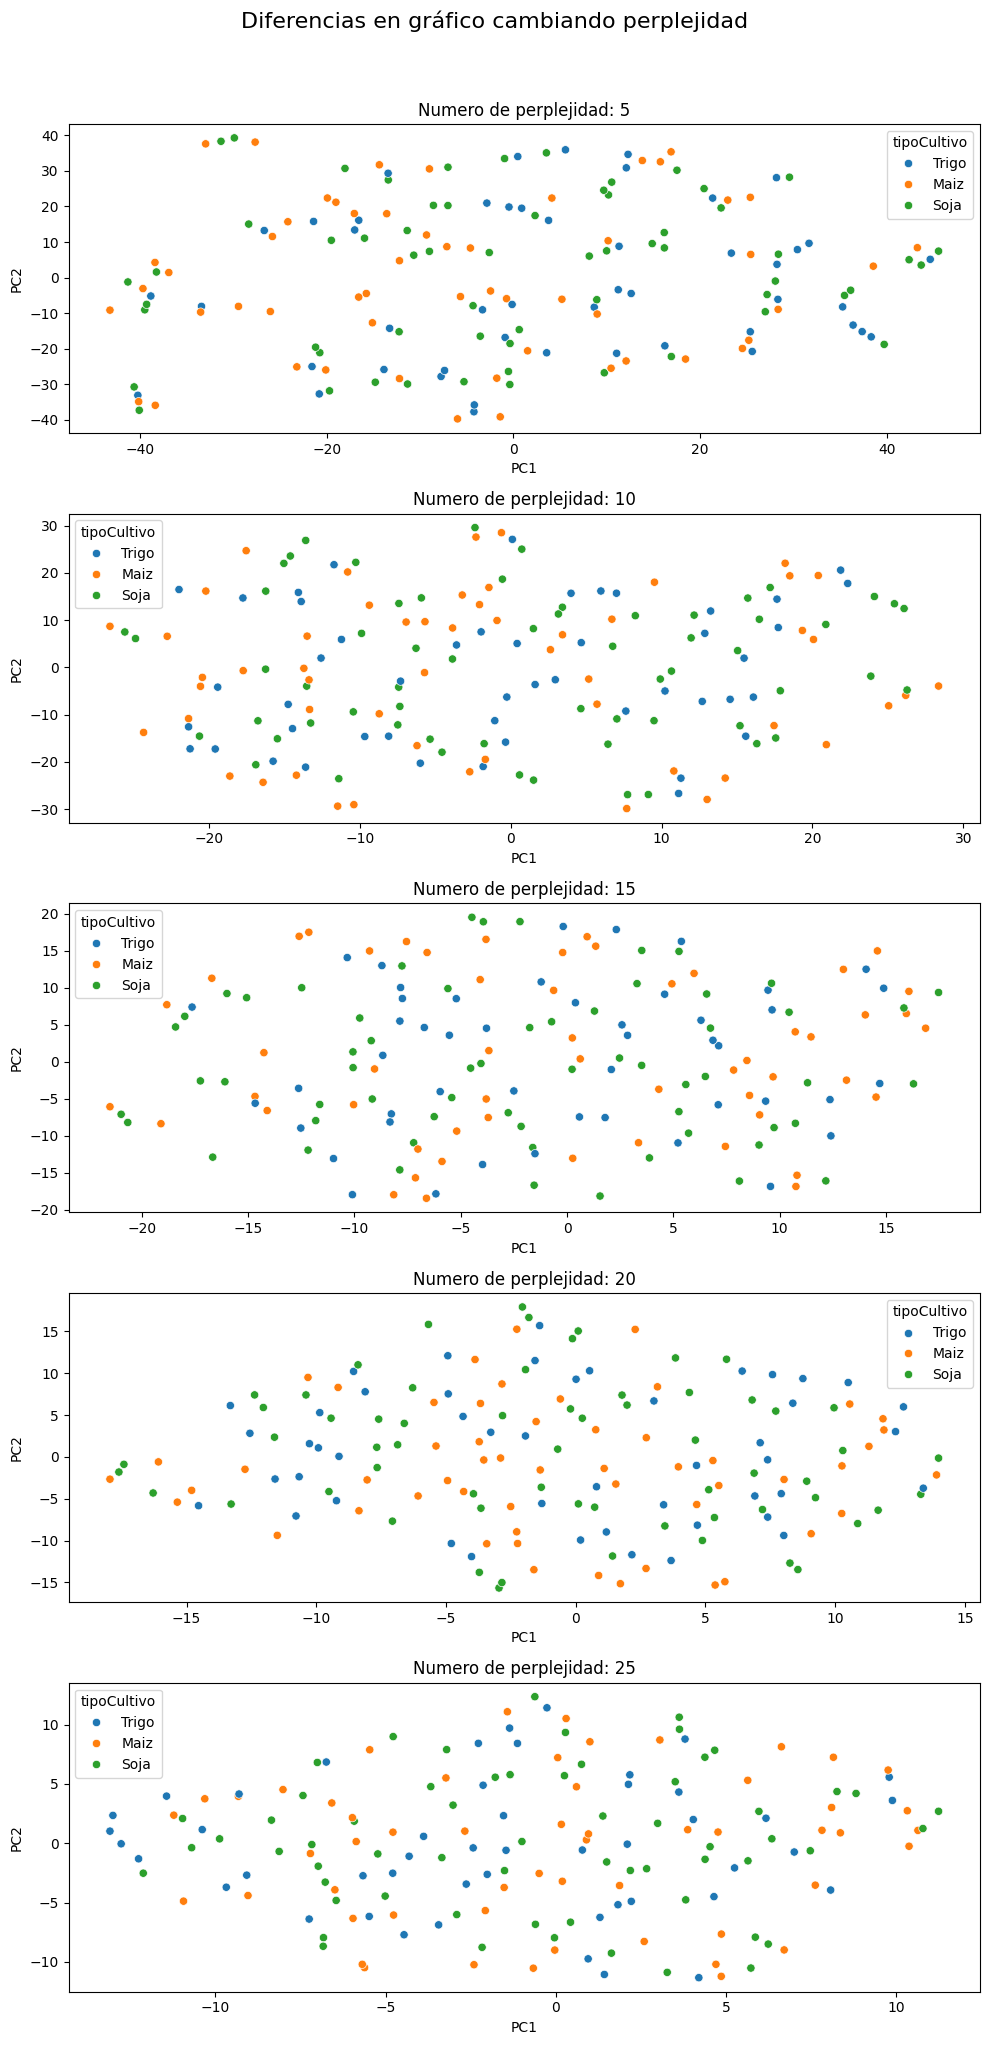

In [187]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))
axes = axes.flatten()

for idx, i in enumerate(range(5,30,5)):
    tsne = TSNE(n_components=2, random_state=42, max_iter=1000, perplexity=i) 
    X_reduced_tsne = tsne.fit_transform(x_escalado)

    tsne_df = pd.DataFrame(data=X_reduced_tsne, columns=['PC1', 'PC2'])
    tsne_df['tipoCultivo'] = y

    sns.scatterplot(tsne_df, x='PC1', y='PC2', hue='tipoCultivo',
        ax=axes[idx])

    
    axes[idx].set_title(f'Numero de perplejidad: {i}')


fig.suptitle('Diferencias en gráfico cambiando perplejidad', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Por otro lado, este algoritmo es sensible a al número de perplejidad, por esta razón los gráficos varían entre sí. Sin embargo, el número de iteraciones no influye en los gráficos. El número de perplejidad óptimo es 5, con el cual aseguramos que el algoritmo converja, facilitando una visualización clara y destacando algunos grupos.
dentro de los datos.

# K-MEANS

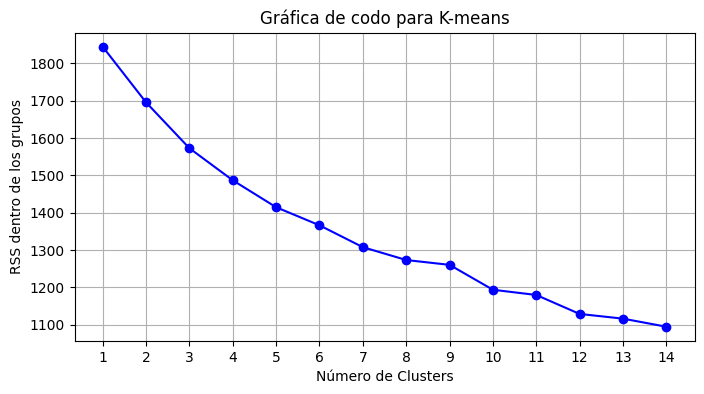

In [188]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=k, random_state=42).fit(x_escalado) for k in Nc]

inertias = [model.inertia_ for model in kmeans]

plt.figure(figsize=(8, 4))
plt.plot(Nc,inertias, "bo-")
plt.xlabel('Número de Clusters')
plt.xticks([x for x in range(1,15,1)])
plt.ylabel('RSS dentro de los grupos')
plt.title('Gráfica de codo para K-means')
plt.grid()
plt.show()

En el gráfico se observa que a medida que el numero de clusters aumenta, el error baja de manera constante.

**GAP para K-MEANS**

In [189]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X)
    return kmeans.inertia_

In [190]:
gaps = []
max_k = 10

for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion(x_escalado, k)

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

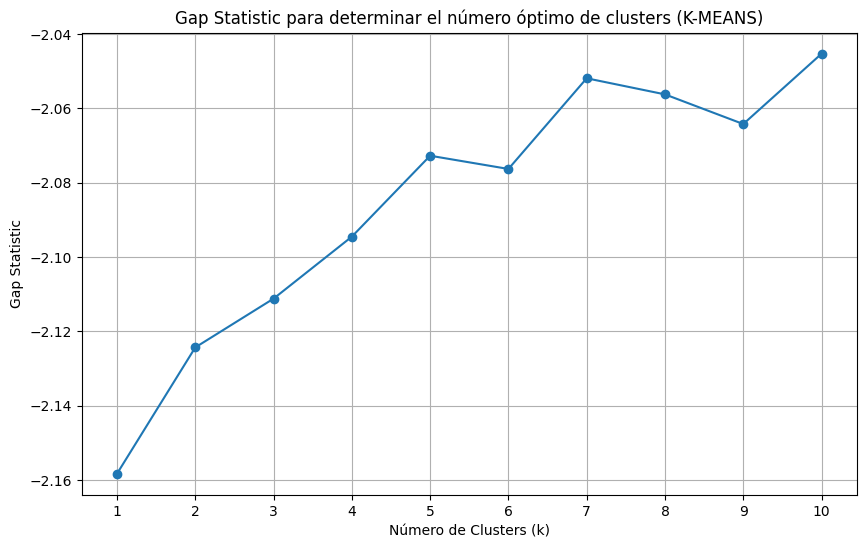

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (K-MEANS)')
plt.xticks([x for x in range(1,11,1)])
plt.grid()
plt.show()

Según el gráfico podemos determinar que el número de clusters óptimo para el modelo es de 3, ya que es en esta iteración donde se estabiliza.

In [192]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_escalado) 

df_kmeans = x_escalado.copy()

df_kmeans['Etiquetas KMeans'] = kmeans.labels_
df_kmeans['Etiquetas KMeans'] = df_kmeans['Etiquetas KMeans'].astype('category')

df_kmeans.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,Etiquetas KMeans
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,1.414415,-1.060408,1.132157,1,0,1,0,0,0,1
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.091070,0.961703,0.569187,0,0,1,0,0,0,0
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,-0.081540,1.251525,-0.556753,0,1,0,0,0,0,0
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,1.471952,-1.488661,-0.275268,1,0,0,1,1,0,2
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,-0.196613,0.411652,-1.007130,0,0,1,0,1,0,0


In [193]:
fig = px.scatter_3d(df_kmeans, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                    color='Etiquetas KMeans',
                    title='K-means de tipoCultivo en 3 dimensiones')
fig.show()

Observando la distribución espacial de los clusters encontrados por K-means, se puede ver que los clusters se encuentran altamente superpuestos, son evidenciar separaciones claras entre ellos, lo cual implica que las variables utilizadas no generan divisiones diferenciadas en el conjunto de datos.

**Dendograma**

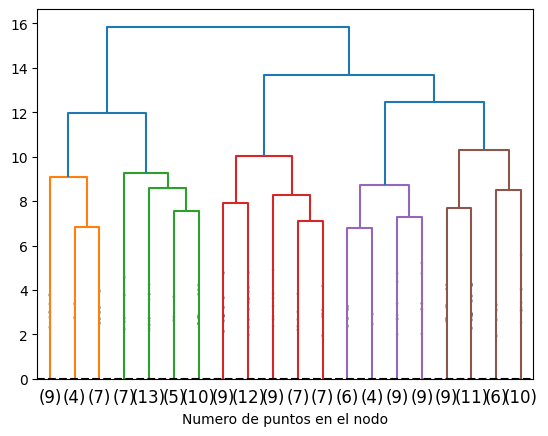

In [194]:
Z = linkage(x_escalado, "ward")

dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = True, show_contracted = True)
plt.axhline(c='k', linestyle='dashed')
plt.xlabel("Numero de puntos en el nodo")
plt.show()

A partir de este gráfico, podemos apreciar como hay 5 clusters principales.

**GAP**

In [195]:
def calculate_intra_cluster_dispersion_clustering(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    X_arr = np.array(X_scaled)  
    centroids = np.array([np.mean(X_arr[labels == i], axis=0) for i in range(k)])
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_arr - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion


In [196]:
gaps = []
max_k = 10
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion_clustering(x_escalado, k, linkage='ward')

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion_clustering(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

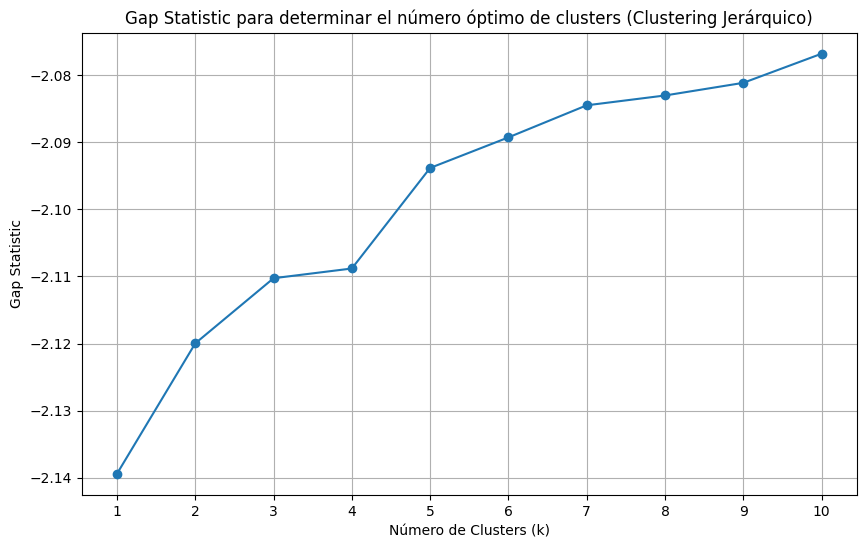

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(1,11,1)])
plt.grid()
plt.show()

Según el gráfico podemos determinar que el número de clusters óptimo para el modelo es de 5, ya que es en esta iteración donde comienza a estabilizarse.

In [198]:
clustering = AgglomerativeClustering(n_clusters=5)

cluster_assignments = clustering.fit_predict(x_escalado)

df_clustering = x_escalado.copy()

df_clustering['Etiquetas jerarquico'] = cluster_assignments 

df_clustering.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,Etiquetas jerarquico
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,1.414415,-1.060408,1.132157,1,0,1,0,0,0,0
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.091070,0.961703,0.569187,0,0,1,0,0,0,1
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,-0.081540,1.251525,-0.556753,0,1,0,0,0,0,1
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,1.471952,-1.488661,-0.275268,1,0,0,1,1,0,1
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,-0.196613,0.411652,-1.007130,0,0,1,0,1,0,1


In [199]:
fig = px.scatter_3d(df_clustering, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                    color='Etiquetas jerarquico',
                    title='Clustering de tipoCultivo en 3 dimensiones')
fig.show()

Observando la distribución espacial de los clusters encontrados por Clustering Jerarquico, se puede ver que los clusters se encuentran altamente superpuestos, son evidenciar separaciones claras entre ellos, es decir que las variables utilizadas no generan divisiones diferenciadas en el conjunto de datos.

In [200]:
silhouette_avg_clustering = silhouette_score(x_escalado, cluster_assignments)
print(f'El coeficiente de silhouette obtenido para el modelo de clustering es de: {round(silhouette_avg_clustering, 2)}')

El coeficiente de silhouette obtenido para el modelo de clustering es de: 0.06


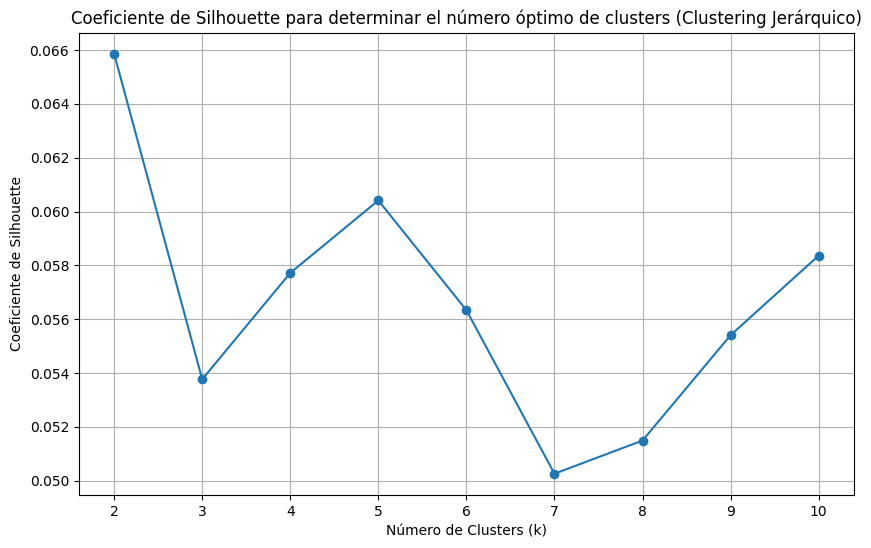

In [201]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 10

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(x_escalado, k)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(2, 11, 1)])
plt.grid()
plt.show()

Este gráfico nos muestra el comportamiento del coeficiente de silhouette con respecto al numero de clusters. Por lo cual, podemos afirmar que la mejor opcion es tomar 5 clusters, ya que hay un máximo local en ese lugar.

# Conclusiones

En este trabajo se utilizaron algoritmos de reducción de dimensionalidad y clustering para analizar y trabajar con el dataset. En los algoritmos de reducción de dimensionalidad se visualizaron mejores resultados con PSA y T-SNE, logrando separar parcialmente las clases y mostrando cierta estructura en los datos. Sin embargo, ISOMAP no presentó buenos resultados, debido a que utiliza distancias geodésicas para la reducción y el dataset tiene muchas columnas cualitativas que al transformarlas en dummies toman valores de 0 o 1, valores que dificultan calcular su distancia. 


Por otro lado, los algoritmos de clustering presentan problemas al trabajar con el dataset, y por ende, los resultados obtenidos no fueron los mejores.
Ni K-means ni clustering jerárquico encuentran suficiente relación entre las variables para formar grupos bien definidos, además de que el Gap Statistic indicó valores poco consistentes y el coeficiente de Silhouette fue muy bajo.  

Luego de analizar los resultados de los algoritmos, notamos que las variables del dataset no son lo suficientemente explicativas como para distinguir con precisión entre los distintos tipos de cultivo. Teniendo en cuenta esto,podemos sugerir que existen más clases o grupos de los 3 dados (trigo-maiz-soja).
